
# Univariate Linear Regression

## Preparation

### Importing relevant packages

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

### Defining the data

In [20]:
x_train = np.array(np.random.uniform(1,10,100)) #Modify this.
y_train = np.array(np.random.uniform(1,10,100)) #Modify this.

In [5]:
print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")
print(x_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (100,), X Type:<class 'numpy.ndarray'>)
[0.0271927  0.84101871 0.17935097 0.35348975 0.15330722 0.87068829
 0.16044257 0.26266554 0.3321961  0.59200239 0.58753623 0.40761136
 0.63182712 0.5404172  0.51247191 0.29022884 0.08469501 0.17881867
 0.36034211 0.92094914 0.58986048 0.86446211 0.29659767 0.34456406
 0.24703332 0.53238973 0.01818918 0.71221663 0.2476182  0.17719502
 0.85576355 0.97782567 0.0165061  0.77816077 0.42276248 0.89178075
 0.07345688 0.85260588 0.90731991 0.07105917 0.68365582 0.7128563
 0.02677425 0.06698994 0.1509015  0.82095766 0.16783196 0.97041816
 0.04230856 0.71715669 0.22768746 0.53064243 0.04784543 0.45472814
 0.53859189 0.15491913 0.70451845 0.37211928 0.84126345 0.51003125
 0.31613374 0.29395991 0.96407124 0.87045103 0.80091213 0.92006771
 0.67536624 0.69025995 0.958642   0.20351982 0.85276374 0.22970982
 0.01772522 0.89560103 0.77433482 0.20892114 0.04225263 0.05412945
 0.50876558 0.73727392 0.84573395 0.90932002 0.12630842 0.21459653
 0.83111076 0.

### Define the initial w and b

In [6]:
w_init = 1
b_init = 0

### (Optional) Z-Score Normalization to make the machine learning process faster

In [8]:
def z_score_normal(x):
    mu = np.mean(x)
    sgm = np.std(x)
    x_z = (x - mu) / sgm
    return x_z

In [9]:
x_z = z_score_normal(x_train)
y_z = z_score_normal(y_train)
print(x_z)
print(y_z)

[-1.49123232  1.16732696 -0.99417058 -0.42530418 -1.07924877  1.26424981
 -1.05593943 -0.7220034  -0.49486504  0.353855    0.33926519 -0.24850287
  0.4839521   0.18533951  0.09404946 -0.63196122 -1.30338712 -0.99590944
 -0.40291927  1.42843903  0.34685792  1.24391048 -0.6111559  -0.45446211
 -0.77306983  0.15911582 -1.5206445   0.74656384 -0.77115918 -1.00121349
  1.21549455  1.61423995 -1.52614267  0.96198631 -0.19900807  1.33315343
 -1.34009921  1.20517925  1.38391586 -1.34793191  0.65326307  0.74865348
 -1.4925993  -1.36122502 -1.08710764  1.10179268 -1.03180021  1.59004153
 -1.44185272  0.76270175 -0.83626774  0.15340786 -1.4237652  -0.09458453
  0.17937667 -1.07398309  0.72141588 -0.3644463   1.16812645  0.08607645
 -0.54733662 -0.61977279  1.56930777  1.26347473  1.03630914  1.42555962
  0.62618315  0.67483703  1.55157185 -0.91521718  1.20569493 -0.82966122
 -1.52216015  1.3456333   0.94948793 -0.89757246 -1.44203543 -1.40323691
  0.08194185  0.82841953  1.18273042  1.39044968 -1

### Plot the data onto a scatter plot

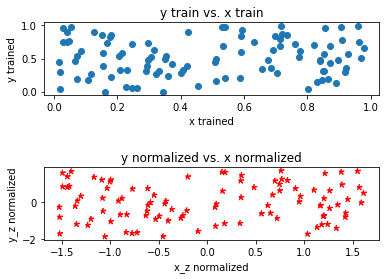

In [10]:
fig = plt.figure(1)
ax1=plt.subplot(2,1,1)
plt.scatter(x_train,y_train,marker='o')
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')
ax2=plt.subplot(2,1,2)
plt.scatter(x_z,y_z,color="r",marker="*",linestyle="dashed")
plt.xlabel("x_z normalized")
plt.ylabel("y_z normalized")
plt.title('y normalized vs. x normalized')
plt.subplots_adjust(wspace=0,hspace=1)
plt.show()

## Set up the model

In [26]:
def predict(x,w,b):
    p = w * x + b
    return p

Text(0.5, 1.0, 'y train vs. x train')

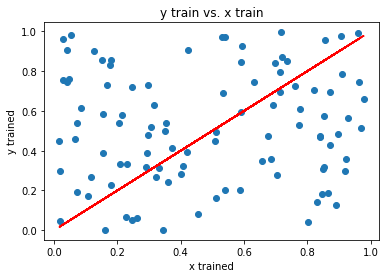

In [12]:
f_wb = predict(x_train,w_init,b_init)
plt.scatter(x_train,y_train,marker='o')
plt.plot(x_train,f_wb,marker='o',markersize=0.1,color="r")
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')

### Set up the cost function

In [21]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = predict(x[i],w,b)
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2*m)
    return cost

In [22]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at initial w : {cost}')

Cost at initial w : 6.762801927235404


### Set up the Gradient Descent

In [23]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        f_wb_i = predict(x[i],w,b)
        dj_dw = dj_dw + (f_wb_i - y[i]) * x[i]
        dj_db = dj_db + (f_wb_i - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [24]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -0.1258362347165886
dj_dw at initial w,b: 6.534940586296162


In [17]:
def gradient_descent(x,y,w_int,b_int,cost_func,gradient_func,alpha,iteration): 
    w = copy.deepcopy(w_int)
    b = b_int
    J = cost_func(x,y,w_int,b_int)
    for i in range(iteration):
        dj_dw,dj_db = gradient_func(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = cost_func(x,y,w,b)
        if i% math.ceil(iteration / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J}")
    return w,b,J

### Test the implement

In [25]:
alpha = 5e-3 #Modify this.
iteration = 10000 #Modify this.

w_final, b_final,J = gradient_descent(x_train, y_train, w_init, b_init,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iteration)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 6.568884924624108
Iteration 1000: Cost 3.4460364651822952
Iteration 2000: Cost 2.980929568265263
Iteration 3000: Cost 2.90264001805583
Iteration 4000: Cost 2.8894618568360686
Iteration 5000: Cost 2.887243630614697
Iteration 6000: Cost 2.8868702456266755
Iteration 7000: Cost 2.88680739525193
Iteration 8000: Cost 2.8867968159042543
Iteration 9000: Cost 2.886795035125735
b,w found by gradient descent: 6.02,-0.07017077751357638 


### Draw the diagram

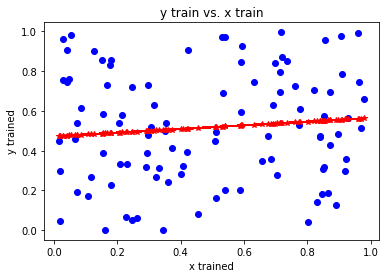

In [19]:
plt.scatter(x_train,y_train,color="b",marker='o')
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')
f_final = predict(x_train,w_final,b_final)
plt.plot(x_train,f_final,color="r",marker="*",)

## Do the prediction

Predicted value for x = 13 is 5.346709514935839


Text(13, 6.346709514935839, 'This is the predict value')

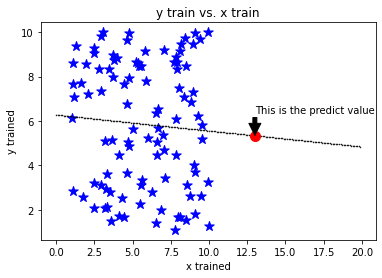

In [36]:
x_value = 13 #Modify this.
y_predict = predict(x_value,w_final,b_final)
print(f"Predicted value for x = {x_value} is {y_predict}")
plt.scatter(x_train,y_train,color="b",marker='*',s=100)
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')
x = np.arange(0, 20, 0.1)
y = predict(x,w_final,b_final)
plt.plot(x,y,color="black",marker=".",linewidth=0.1,markersize=1)
plt.plot(x_value,y_predict,color="r",marker="o",markersize=10)
plt.annotate("This is the predict value", xy=(x_value,y_predict), xytext=(x_value, y_predict+1),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )